In [72]:
import warnings  # 경고 메시지 무시
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
# 한글 폰트를 설정하여 시각화에 한글이 깨지지 않도록 설정
plt.rcParams['font.family'] = 'gulim'

# 데이터 불러오기

In [73]:
import pandas as pd

In [74]:
# Load datasets
status_analysis = pd.read_csv("/Users/iyuseon/Desktop/archive (1)/Status_Analysis.csv")
service_options = pd.read_csv("/Users/iyuseon/Desktop/archive (1)/service_options.csv")
online_services = pd.read_csv("/Users/iyuseon/Desktop/archive (1)/online_services.csv")
payment_info = pd.read_csv("/Users/iyuseon/Desktop/archive (1)/payment_info.csv")
location_data = pd.read_csv("/Users/iyuseon/Desktop/archive (1)/location_data.csv")
customer_info = pd.read_csv("/Users/iyuseon/Desktop/archive (1)/customer_info.csv")

# 데이터 결합

In [75]:
# Merge datasets on customer_id
df = status_analysis.merge(service_options, on='customer_id')
df = df.merge(online_services, on='customer_id')
df = df.merge(payment_info, on='customer_id')

In [76]:
df

,customer_id,satisfaction_score,cltv,customer_status,churn_score,churn_label,churn_value,churn_category,churn_reason,tenure,...,contract,paperless_billing,payment_method,monthly_ charges,avg_monthly_long_distance_charges,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue
0,0002-ORFBO,3,2205,Stayed,65,No,0,Not Applicable,NaN,9,...,One Year,Yes,Mailed check,65.60,42.39,593.30,0.00,0,381.51,974.81
1,0003-MKNFE,5,5414,Stayed,66,No,0,Not Applicable,NaN,9,...,Month-to-Month,No,Mailed check,59.90,10.69,542.40,38.33,10,96.21,610.28
2,0004-TLHLJ,1,4479,Churned,71,Yes,1,Competitor,Competitor had better devices,4,...,Month-to-Month,Yes,Electronic check,73.90,33.65,280.85,0.00,0,134.60,415.45
3,0011-IGKFF,1,3714,Churned,91,Yes,1,Dissatisfaction,Product dissatisfaction,13,...,Month-to-Month,Yes,Electronic check,98.00,27.82,1237.85,0.00,0,361.66,1599.51
4,0013-EXCHZ,1,3464,Churned,68,Yes,1,Dissatisfaction,Network reliability,3,...,Month-to-Month,Yes,Mailed check,83.90,7.38,267.40,0.00,0,22.14,289.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,4,3161,Stayed,59,No,0,Not Applicable,NaN,13,...,One Year,No,Mailed check,55.15,46.68,742.90,0.00,0,606.84,1349.74
7039,9992-RRAMN,1,5248,Churned,68,Yes,1,Dissatisfaction,Product dissatisfaction,22,...,Month-to-Month,Yes,Electronic check,85.10,16.20,1873.70,0.00,0,356.40,2230.10
7040,9992-UJOEL,5,5870,Joined,33,No,0,Not Applicable,NaN,2,...,Month-to-Month,Yes,Mailed check,50.30,18.62,92.75,0.00,0,37.24,129.99
7041,9993-LHIEB,3,4792,Stayed,59,No,0,Not Applicable,NaN,67,...,Two Year,No,Mailed check,67.85,2.12,4627.65,0.00,0,142.04,4769.69


# 불필요한 컬럼 삭제

In [77]:
df = df.drop(columns=['churn_label']) 
df = df.drop(columns=['churn_score'])
# Churn Value -> 목표 변수수

In [78]:
df

,customer_id,satisfaction_score,cltv,customer_status,churn_value,churn_category,churn_reason,tenure,internet_service_x,phone_service_x,...,contract,paperless_billing,payment_method,monthly_ charges,avg_monthly_long_distance_charges,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue
0,0002-ORFBO,3,2205,Stayed,0,Not Applicable,NaN,9,Yes,Yes,...,One Year,Yes,Mailed check,65.60,42.39,593.30,0.00,0,381.51,974.81
1,0003-MKNFE,5,5414,Stayed,0,Not Applicable,NaN,9,Yes,Yes,...,Month-to-Month,No,Mailed check,59.90,10.69,542.40,38.33,10,96.21,610.28
2,0004-TLHLJ,1,4479,Churned,1,Competitor,Competitor had better devices,4,Yes,Yes,...,Month-to-Month,Yes,Electronic check,73.90,33.65,280.85,0.00,0,134.60,415.45
3,0011-IGKFF,1,3714,Churned,1,Dissatisfaction,Product dissatisfaction,13,Yes,Yes,...,Month-to-Month,Yes,Electronic check,98.00,27.82,1237.85,0.00,0,361.66,1599.51
4,0013-EXCHZ,1,3464,Churned,1,Dissatisfaction,Network reliability,3,Yes,Yes,...,Month-to-Month,Yes,Mailed check,83.90,7.38,267.40,0.00,0,22.14,289.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,4,3161,Stayed,0,Not Applicable,NaN,13,Yes,Yes,...,One Year,No,Mailed check,55.15,46.68,742.90,0.00,0,606.84,1349.74
7039,9992-RRAMN,1,5248,Churned,1,Dissatisfaction,Product dissatisfaction,22,Yes,Yes,...,Month-to-Month,Yes,Electronic check,85.10,16.20,1873.70,0.00,0,356.40,2230.10
7040,9992-UJOEL,5,5870,Joined,0,Not Applicable,NaN,2,Yes,Yes,...,Month-to-Month,Yes,Mailed check,50.30,18.62,92.75,0.00,0,37.24,129.99
7041,9993-LHIEB,3,4792,Stayed,0,Not Applicable,NaN,67,Yes,Yes,...,Two Year,No,Mailed check,67.85,2.12,4627.65,0.00,0,142.04,4769.69


# 기본 통계 확인

In [79]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 36 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   customer_id                        7043 non-null   object 
 1   satisfaction_score                 7043 non-null   int64  
 2   cltv                               7043 non-null   int64  
 3   customer_status                    7043 non-null   object 
 4   churn_value                        7043 non-null   int64  
 5   churn_category                     7043 non-null   object 
 6   churn_reason                       1869 non-null   object 
 7   tenure                             7043 non-null   int64  
 8   internet_service_x                 7043 non-null   object 
 9   phone_service_x                    7043 non-null   object 
 10  multiple_lines                     7043 non-null   object 
 11  avg_monthly_gb_download            7043 non-null   int64

In [80]:
print(df.isnull().sum())

customer_id                             0
satisfaction_score                      0
cltv                                    0
customer_status                         0
churn_value                             0
churn_category                          0
churn_reason                         5174
tenure                                  0
internet_service_x                      0
phone_service_x                         0
multiple_lines                          0
avg_monthly_gb_download                 0
unlimited_data                          0
offer                                3877
referred_a_friend                       0
number_of_referrals                     0
phone_service_y                         0
internet_service_y                      0
online_security                         0
online_backup                           0
device_protection                       0
premium_tech_support                    0
streaming_tv                            0
streaming_movies                  

# 불필요한 컬럼 삭제

In [81]:
df = df.drop(columns=['customer_id'])

In [82]:
df = df.drop(columns=['churn_reason'])

In [83]:
df = df.drop(columns=['internet_service_y'])
df = df.drop(columns=['phone_service_y'])

In [84]:
df.head()

,satisfaction_score,cltv,customer_status,churn_value,churn_category,tenure,internet_service_x,phone_service_x,multiple_lines,avg_monthly_gb_download,...,contract,paperless_billing,payment_method,monthly_ charges,avg_monthly_long_distance_charges,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue
0,3,2205,Stayed,0,Not Applicable,9,Yes,Yes,No,16,...,One Year,Yes,Mailed check,65.6,42.39,593.30,0.00,0,381.51,974.81
1,5,5414,Stayed,0,Not Applicable,9,Yes,Yes,Yes,10,...,Month-to-Month,No,Mailed check,59.9,10.69,542.40,38.33,10,96.21,610.28
2,1,4479,Churned,1,Competitor,4,Yes,Yes,No,30,...,Month-to-Month,Yes,Electronic check,73.9,33.65,280.85,0.00,0,134.60,415.45
3,1,3714,Churned,1,Dissatisfaction,13,Yes,Yes,No,4,...,Month-to-Month,Yes,Electronic check,98.0,27.82,1237.85,0.00,0,361.66,1599.51
4,1,3464,Churned,1,Dissatisfaction,3,Yes,Yes,No,11,...,Month-to-Month,Yes,Mailed check,83.9,7.38,267.40,0.00,0,22.14,289.54


# 컬럼 확인 및 라벨인코딩

In [85]:
df['satisfaction_score'].value_counts()

satisfaction_score
3    2665
4    1789
5    1149
1     922
2     518
Name: count, dtype: int64

In [86]:
df['cltv'].value_counts()                     

cltv
5546    8
4741    7
4745    7
4369    7
4115    7
       ..
4557    1
4833    1
4692    1
3327    1
5639    1
Name: count, Length: 3438, dtype: int64

In [87]:
df['customer_status'].value_counts()                     

customer_status
Stayed     4720
Churned    1869
Joined      454
Name: count, dtype: int64

# 범주형 컬럼으로 라벨인코딩 실행

In [88]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [89]:
df['customer_status'] = le.fit_transform(df['customer_status'])
df['customer_status'].value_counts()

customer_status
2    4720
0    1869
1     454
Name: count, dtype: int64

In [90]:
df['churn_value'].value_counts()                     

churn_value
0    5174
1    1869
Name: count, dtype: int64

In [91]:
df['churn_category'].value_counts()  

churn_category
Not Applicable     5174
Competitor          841
Attitude            314
Dissatisfaction     303
Price               211
Other               200
Name: count, dtype: int64

In [92]:
df['churn_category'] = le.fit_transform(df['churn_category'])
df['churn_category'].value_counts()

churn_category
3    5174
1     841
0     314
2     303
5     211
4     200
Name: count, dtype: int64

In [93]:
df['tenure'].value_counts()  

tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64

In [94]:
df['internet_service_x'].value_counts()  

internet_service_x
Yes    5517
No     1526
Name: count, dtype: int64

In [95]:
df['internet_service'] = le.fit_transform(df['internet_service_x'])
df = df.drop(columns=['internet_service_x'])
df['internet_service'].value_counts()  

internet_service
1    5517
0    1526
Name: count, dtype: int64

In [96]:
df['phone_service_x'].value_counts()  

phone_service_x
Yes    6361
No      682
Name: count, dtype: int64

In [97]:
df['phone_service'] = le.fit_transform(df['phone_service_x'])
df = df.drop(columns=['phone_service_x'])
df['phone_service'].value_counts()  

phone_service
1    6361
0     682
Name: count, dtype: int64

In [98]:
df['multiple_lines'].value_counts()  

multiple_lines
No     4072
Yes    2971
Name: count, dtype: int64

In [99]:
df['multiple_lines'] = le.fit_transform(df['multiple_lines'])
df['multiple_lines'].value_counts()  

multiple_lines
0    4072
1    2971
Name: count, dtype: int64

In [100]:
df['avg_monthly_gb_download'].value_counts()  

avg_monthly_gb_download
0     1526
19     220
27     199
30     193
59     192
26     191
23     179
22     172
21     171
18     164
13     164
17     155
16     155
20     151
24     148
28     147
11     145
12     143
29     138
15     132
10     132
14     131
25     130
3      130
4      129
52     121
8      120
7      116
9      116
2      116
5      114
6      114
51      90
53      88
48      86
73      81
69      75
41      67
76      58
85      48
58      45
42      45
82      43
71      42
47      36
57      34
46      19
56      16
75      15
39       1
Name: count, dtype: int64

In [101]:
df['unlimited_data'].value_counts()  

unlimited_data
Yes    4745
No     2298
Name: count, dtype: int64

In [102]:
df['unlimited_data'] = le.fit_transform(df['unlimited_data'])
df['unlimited_data'].value_counts()  

unlimited_data
1    4745
0    2298
Name: count, dtype: int64

In [103]:
df['offer'].value_counts()  

offer
Offer B    824
Offer E    805
Offer D    602
Offer A    520
Offer C    415
Name: count, dtype: int64

In [104]:
df['offer'] = le.fit_transform(df['offer'])
df['offer'].value_counts()  

offer
5    3877
1     824
4     805
3     602
0     520
2     415
Name: count, dtype: int64

In [105]:
df['referred_a_friend'].value_counts()  

referred_a_friend
No     3821
Yes    3222
Name: count, dtype: int64

In [106]:
df['referred_a_friend'] = le.fit_transform(df['referred_a_friend'])
df['referred_a_friend'].value_counts()  

referred_a_friend
0    3821
1    3222
Name: count, dtype: int64

In [107]:
df['number_of_referrals'].value_counts()  

number_of_referrals
0     3821
1     1086
5      264
3      255
7      248
9      238
2      236
4      236
10     223
6      221
8      213
11       2
Name: count, dtype: int64

In [108]:
df['online_security'].value_counts()  

online_security
No     5024
Yes    2019
Name: count, dtype: int64

In [109]:
df['online_security'] = le.fit_transform(df['online_security'])
df['online_security'].value_counts() 

online_security
0    5024
1    2019
Name: count, dtype: int64

In [110]:
df['online_backup'].value_counts()  

online_backup
No     4614
Yes    2429
Name: count, dtype: int64

In [111]:
df['online_backup'] = le.fit_transform(df['online_backup'])
df['online_backup'].value_counts() 

online_backup
0    4614
1    2429
Name: count, dtype: int64

In [112]:
df['device_protection'].value_counts()  

device_protection
No     4621
Yes    2422
Name: count, dtype: int64

In [113]:
df['device_protection'] = le.fit_transform(df['device_protection'])
df['device_protection'].value_counts() 

device_protection
0    4621
1    2422
Name: count, dtype: int64

In [114]:
df['premium_tech_support'].value_counts() 

premium_tech_support
No     4999
Yes    2044
Name: count, dtype: int64

In [115]:
df['premium_tech_support'] = le.fit_transform(df['premium_tech_support'])
df['premium_tech_support'].value_counts() 

premium_tech_support
0    4999
1    2044
Name: count, dtype: int64

In [116]:
df['streaming_tv'].value_counts() 

streaming_tv
No     4336
Yes    2707
Name: count, dtype: int64

In [117]:
df['streaming_tv'] = le.fit_transform(df['streaming_tv'])
df['streaming_tv'].value_counts() 

streaming_tv
0    4336
1    2707
Name: count, dtype: int64

In [118]:
df['streaming_movies'].value_counts() 

streaming_movies
No     4311
Yes    2732
Name: count, dtype: int64

In [119]:
df['streaming_movies'] = le.fit_transform(df['streaming_movies'])
df['streaming_movies'].value_counts() 

streaming_movies
0    4311
1    2732
Name: count, dtype: int64

In [120]:
df['streaming_music'].value_counts() 

streaming_music
No     4555
Yes    2488
Name: count, dtype: int64

In [121]:
df['streaming_music'] = le.fit_transform(df['streaming_music'])
df['streaming_music'].value_counts() 

streaming_music
0    4555
1    2488
Name: count, dtype: int64

In [122]:
df['internet_type'].value_counts() 

internet_type
Fiber Optic    3035
DSL            1652
Cable           830
Name: count, dtype: int64

In [123]:
df['internet_type'] = le.fit_transform(df['internet_type'])
df['internet_type'].value_counts() 

internet_type
2    3035
1    1652
3    1526
0     830
Name: count, dtype: int64

In [124]:
df['contract'].value_counts() 

contract
Month-to-Month    3610
Two Year          1883
One Year          1550
Name: count, dtype: int64

In [125]:
df['contract'] = le.fit_transform(df['contract'])
df['contract'].value_counts() 

contract
0    3610
2    1883
1    1550
Name: count, dtype: int64

In [126]:
df['paperless_billing'].value_counts() 

paperless_billing
Yes    4171
No     2872
Name: count, dtype: int64

In [127]:
df['paperless_billing'] = le.fit_transform(df['paperless_billing'])
df['paperless_billing'].value_counts() 

paperless_billing
1    4171
0    2872
Name: count, dtype: int64

In [128]:
df['payment_method'].value_counts() 

payment_method
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

In [129]:
df['payment_method'] = le.fit_transform(df['payment_method'])
df['payment_method'].value_counts() 

payment_method
2    2365
3    1612
0    1544
1    1522
Name: count, dtype: int64

In [130]:
df['monthly_ charges'].value_counts() 

monthly_ charges
20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
116.55     1
106.85     1
68.55      1
108.80     1
67.85      1
Name: count, Length: 1585, dtype: int64

In [131]:
df['avg_monthly_long_distance_charges'].value_counts() 

avg_monthly_long_distance_charges
0.00     682
18.26      7
30.07      6
45.92      6
30.09      6
        ... 
32.23      1
22.26      1
47.03      1
42.21      1
2.01       1
Name: count, Length: 3584, dtype: int64

In [132]:
df['total_charges'].value_counts() 

total_charges
20.20      11
19.75       9
19.90       8
20.05       8
19.65       8
           ..
829.55      1
625.65      1
462.80      1
251.25      1
3707.60     1
Name: count, Length: 6540, dtype: int64

In [133]:
df['total_refunds'].value_counts() 

total_refunds
0.00     6518
16.56       2
8.74        2
1.31        2
41.74       2
         ... 
31.90       1
12.07       1
37.37       1
48.59       1
10.20       1
Name: count, Length: 500, dtype: int64

In [134]:
df['total_extra_data_charges'].value_counts() 

total_extra_data_charges
0      6315
10      138
40       62
30       58
20       51
80       47
100      44
50       43
150      42
130      40
140      38
60       36
90       35
70       34
110      32
120      28
Name: count, dtype: int64

In [135]:
df['total_long_distance_charges'].value_counts() 

total_long_distance_charges
0.00       682
15.60        4
48.96        4
22.86        4
597.60       3
          ... 
200.75       1
217.62       1
2288.43      1
1417.68      1
142.04       1
Name: count, Length: 6068, dtype: int64

In [136]:
df['total_revenue'].value_counts() 

total_revenue
24.80      3
116.27     3
68.41      3
66.56      3
3386.40    2
          ..
976.70     1
300.65     1
3258.42    1
1713.52    1
3707.60    1
Name: count, Length: 6975, dtype: int64

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   satisfaction_score                 7043 non-null   int64  
 1   cltv                               7043 non-null   int64  
 2   customer_status                    7043 non-null   int64  
 3   churn_value                        7043 non-null   int64  
 4   churn_category                     7043 non-null   int64  
 5   tenure                             7043 non-null   int64  
 6   multiple_lines                     7043 non-null   int64  
 7   avg_monthly_gb_download            7043 non-null   int64  
 8   unlimited_data                     7043 non-null   int64  
 9   offer                              7043 non-null   int64  
 10  referred_a_friend                  7043 non-null   int64  
 11  number_of_referrals                7043 non-null   int64

# 시각화

In [138]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

findfont: Font family 'gulim' not found.
findfont: Font family 'gulim' not found.
findfont: Font family 'gulim' not found.
findfont: Font family 'gulim' not found.
findfont: Font family 'gulim' not found.
findfont: Font family 'gulim' not found.
findfont: Font family 'gulim' not found.
findfont: Font family 'gulim' not found.
findfont: Font family 'gulim' not found.
findfont: Font family 'gulim' not found.
findfont: Font family 'gulim' not found.
findfont: Font family 'gulim' not found.
findfont: Font family 'gulim' not found.
findfont: Font family 'gulim' not found.
findfont: Font family 'gulim' not found.
findfont: Font family 'gulim' not found.
findfont: Font family 'gulim' not found.
findfont: Font family 'gulim' not found.
findfont: Font family 'gulim' not found.


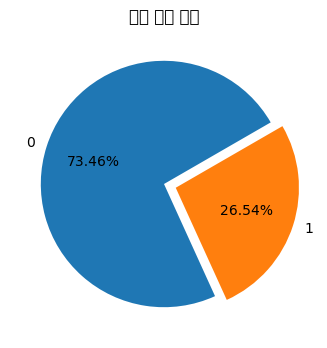

In [139]:
# 종속변수 시각화
Flag = df['churn_value'].value_counts()

plt.figure(figsize=(9,4))
plt.pie(Flag, labels=Flag.index, autopct='%1.2f%%',
        startangle=30, explode=[0, 0.1])
plt.title('고객 이탈 비율')
plt.show()

findfont: Font family 'gulim' not found.
findfont: Font family 'gulim' not found.
findfont: Font family 'gulim' not found.
findfont: Font family 'gulim' not found.
findfont: Font family 'gulim' not found.
findfont: Font family 'gulim' not found.
findfont: Font family 'gulim' not found.
findfont: Font family 'gulim' not found.
findfont: Font family 'gulim' not found.
findfont: Font family 'gulim' not found.
findfont: Font family 'gulim' not found.
findfont: Font family 'gulim' not found.
findfont: Font family 'gulim' not found.
findfont: Font family 'gulim' not found.
findfont: Font family 'gulim' not found.
findfont: Font family 'gulim' not found.
findfont: Font family 'gulim' not found.
findfont: Font family 'gulim' not found.
findfont: Font family 'gulim' not found.
findfont: Font family 'gulim' not found.
findfont: Font family 'gulim' not found.
findfont: Font family 'gulim' not found.
findfont: Font family 'gulim' not found.
findfont: Font family 'gulim' not found.
findfont: Font f

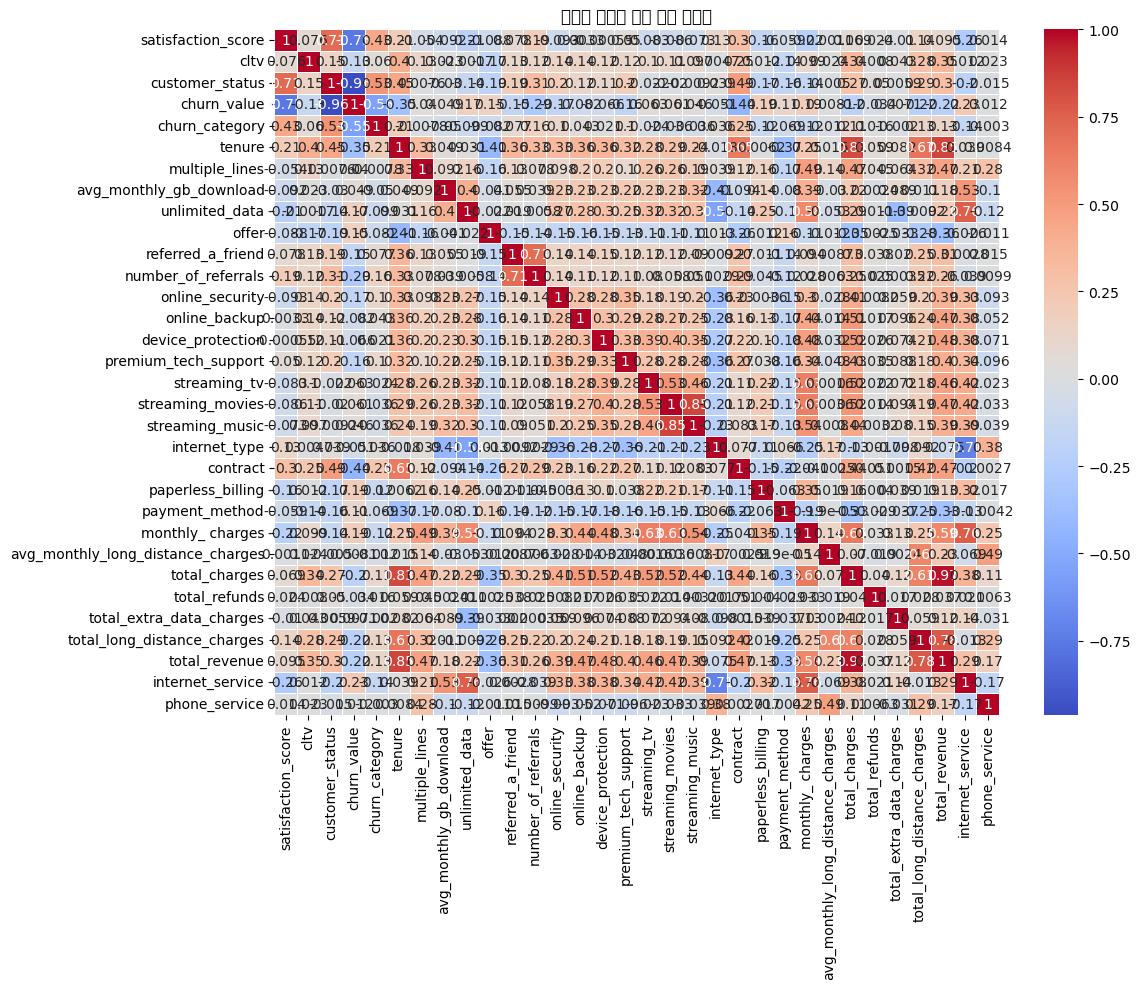

In [140]:
# 수치형 특성의 상관 관계 히트맵 시각화 (수치형 컬럼만 사용)

numeric_data = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 10))
corr_matrix = numeric_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('수치형 특성의 상관 관계 히트맵')
plt.tight_layout()
plt.show()

In [141]:
# int 데이터 타입을 'cat_col'에 추가
num_col = []
for col in df.columns:
    if df[col].dtype in ['int', 'float']:
        num_col.append(col)
print(num_col)

['satisfaction_score', 'cltv', 'customer_status', 'churn_value', 'churn_category', 'tenure', 'multiple_lines', 'avg_monthly_gb_download', 'unlimited_data', 'offer', 'referred_a_friend', 'number_of_referrals', 'online_security', 'online_backup', 'device_protection', 'premium_tech_support', 'streaming_tv', 'streaming_movies', 'streaming_music', 'internet_type', 'contract', 'paperless_billing', 'payment_method', 'monthly_ charges', 'avg_monthly_long_distance_charges', 'total_charges', 'total_refunds', 'total_extra_data_charges', 'total_long_distance_charges', 'total_revenue', 'internet_service', 'phone_service']


IndexError: index 7 is out of bounds for axis 0 with size 7

findfont: Font family 'gulim' not found.
findfont: Font family 'gulim' not found.
findfont: Font family 'gulim' not found.
findfont: Font family 'gulim' not found.
findfont: Font family 'gulim' not found.
findfont: Font family 'gulim' not found.
findfont: Font family 'gulim' not found.
findfont: Font family 'gulim' not found.
findfont: Font family 'gulim' not found.
findfont: Font family 'gulim' not found.
findfont: Font family 'gulim' not found.
findfont: Font family 'gulim' not found.
findfont: Font family 'gulim' not found.
findfont: Font family 'gulim' not found.
findfont: Font family 'gulim' not found.
findfont: Font family 'gulim' not found.
findfont: Font family 'gulim' not found.
findfont: Font family 'gulim' not found.
findfont: Font family 'gulim' not found.
findfont: Font family 'gulim' not found.
findfont: Font family 'gulim' not found.
findfont: Font family 'gulim' not found.
findfont: Font family 'gulim' not found.
findfont: Font family 'gulim' not found.
findfont: Font f

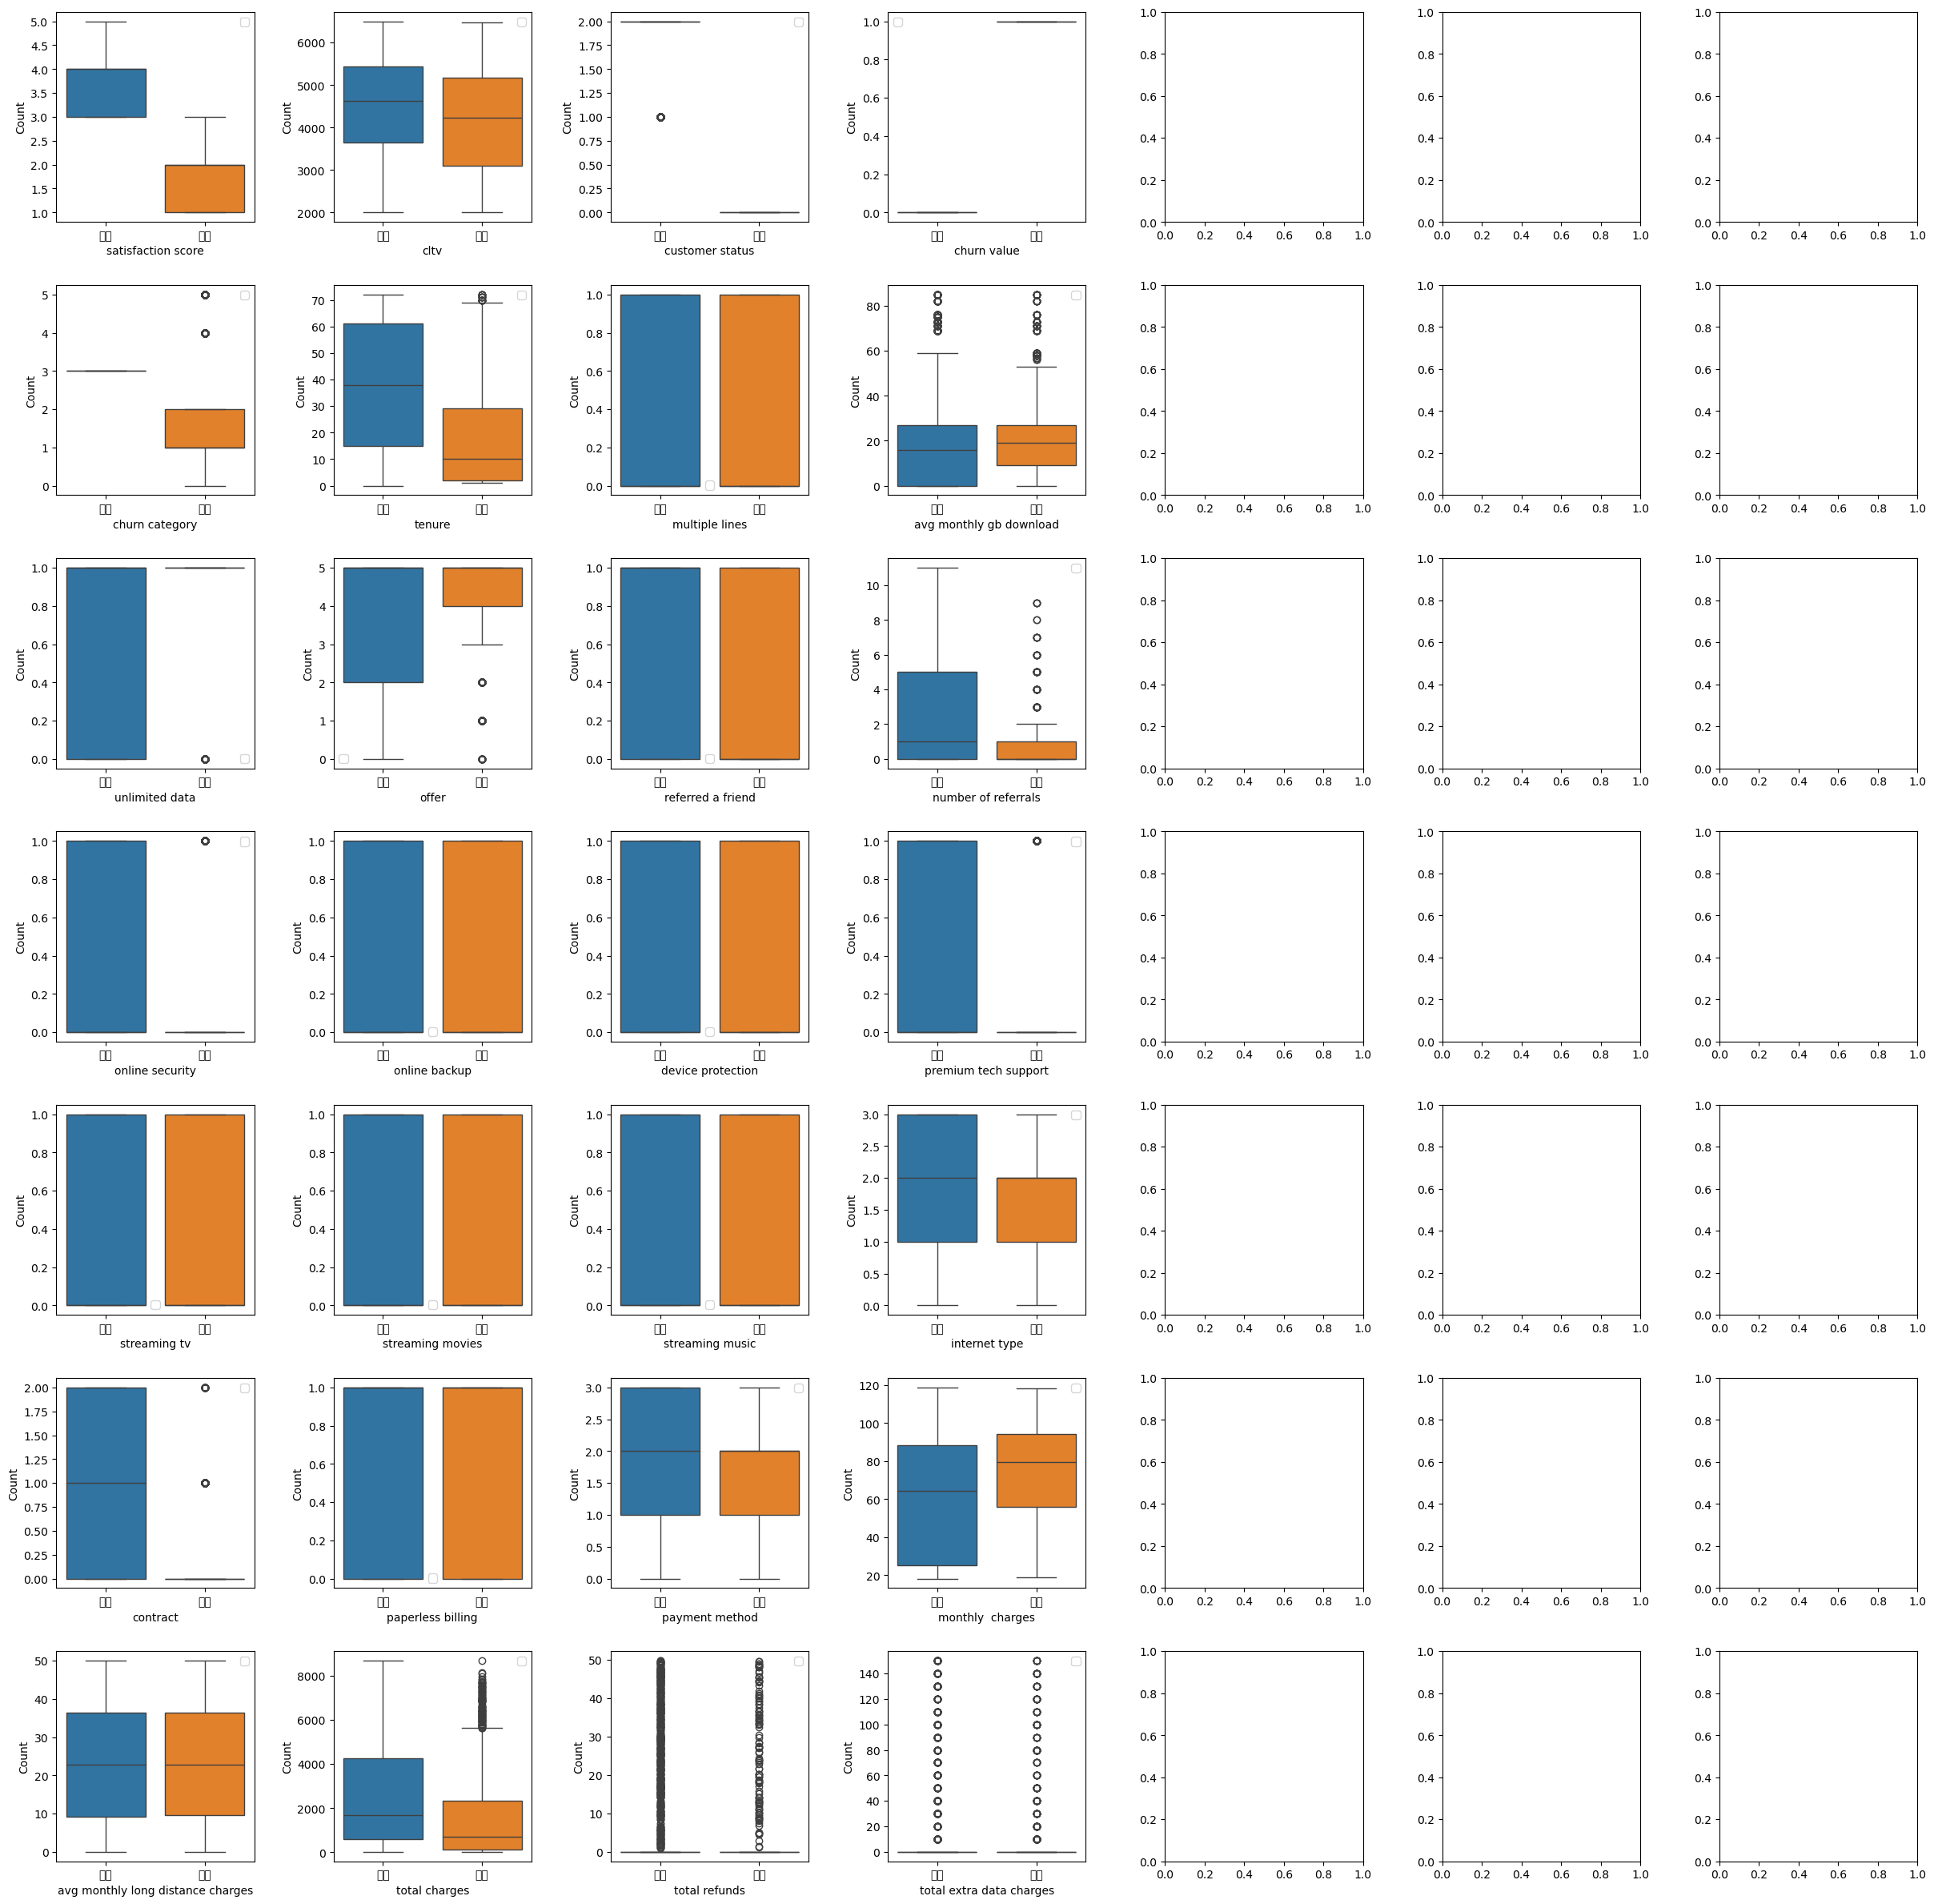

In [142]:
# 수치형 컬럼 탐색 시각화 ('churn_value'에 따른 분포를 시각화)
figure2, axes_array2 = plt.subplots(7, 7, figsize=(30, 30))
# 4x4 배열의 서브플롯 생성, 전체 크기는 16x16 인치로 설정
plt.subplots_adjust(hspace=0.3, wspace=0.4)
# 서브플롯 간의 수평 및 수직 간격 조정

for i, col in enumerate(num_col):
    # num_col 리스트의 각 수치형 컬럼에 대해 반복
    sns.boxplot(data=df, x=df['churn_value'], y=df[col], hue='churn_value', ax=axes_array2[i // 4][i % 4])
    # seaborn을 사용하여 박스플롯 생성
    # x축은 'churn_value', y축은 현재 컬럼, 색상 구분도 'churn_value'로 설정
    # 서브플롯은 axes_array2의 적절한 위치에 배치
    axes_array2[i // 4][i % 4].set_xlabel(col.replace('_', ' '))
    # x축 레이블을 현재 컬럼명에서 언더바를 공백으로 대체하여 설정
    axes_array2[i // 4][i % 4].set_ylabel('Count')
    # y축 레이블을 'Count'로 설정
    axes_array2[i // 4][i % 4].set_xticklabels(['유지', '이탈'])
    # x축 눈금 레이블을 '유지'와 '이탈'로 설정 (churn_value 값에 따라)
    axes_array2[i // 4][i % 4].legend([])
    # 범례를 제거하여 그래프의 깔끔함 유지
plt.show()
# 모든 서브플롯을 화면에 출력

# 랜덤포레스트로 속성중요도 확인

In [439]:
y = df['churn_value']  # 이탈 여부 (0: Stayed, 1: Churned)
X = df.drop(columns=['churn_value'])

In [446]:
from sklearn.model_selection import train_test_split

# 데이터 분리 (80% 훈련, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [447]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# 랜덤 포레스트 모델 학습
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# 피처 중요도 추출
feature_importances = pd.DataFrame(rf.feature_importances_, index=X.columns, columns=['importance'])

# 중요도 내림차순 정렬
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

# 출력
print(feature_importances)


                                   importance
customer_status                      0.332420
churn_category                       0.302407
satisfaction_score                   0.251225
contract                             0.027881
number_of_referrals                  0.015331
tenure                               0.013074
total_long_distance_charges          0.008874
monthly_ charges                     0.008813
total_charges                        0.007476
total_revenue                        0.005997
avg_monthly_gb_download              0.005102
internet_type                        0.003655
internet_service                     0.002401
payment_method                       0.002195
cltv                                 0.001900
paperless_billing                    0.001809
premium_tech_support                 0.001752
avg_monthly_long_distance_charges    0.001744
online_security                      0.001282
offer                                0.001029
unlimited_data                    

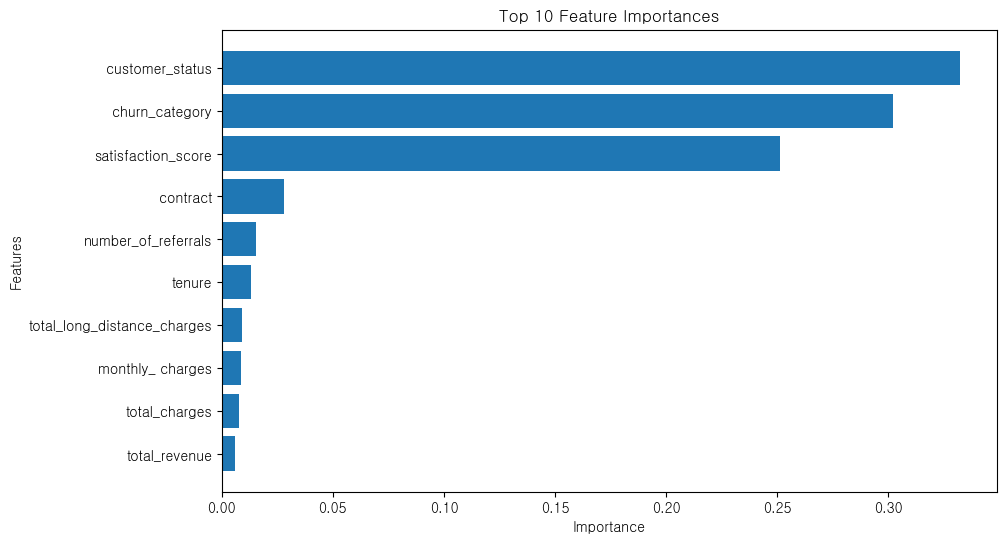

In [448]:
import matplotlib.pyplot as plt

# 상위 10개 중요한 변수 시각화
top_features = feature_importances.head(10)
plt.figure(figsize=(10, 6))
plt.barh(top_features.index, top_features['importance'])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top 10 Feature Importances')
plt.gca().invert_yaxis()  # 상위 중요도를 위로 정렬
plt.show()